In [1]:
import pandas as pd
import numpy as np

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Display the first few rows of the daily_return_df
daily_return_df

,Date,BA Close,AAPL Close,MSFT Close,GOOG Close,AMZN Close
0,2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-01-05,-0.006950,-0.028576,-0.009239,-0.021066,-0.020731
2,2015-01-06,-0.011849,0.000094,-0.014786,-0.023450,-0.023098
3,2015-01-07,0.015407,0.013925,0.012625,-0.001715,0.010544
4,2015-01-08,0.017528,0.037703,0.028994,0.003148,0.006813
...,...,...,...,...,...,...
2259,2023-12-22,-0.006048,-0.005563,0.002780,0.006467,-0.002734
2260,2023-12-26,0.008983,-0.002845,0.000214,0.000700,-0.000065
2261,2023-12-27,-0.002629,0.000518,-0.001576,-0.009710,-0.000456
2262,2023-12-28,-0.006699,0.002224,0.003229,-0.001132,0.000261


In [2]:
# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Display the mean returns and covariance matrix to verify correctness
print("Annualized Mean Returns:\n", mean_returns)
print("Annualized Covariance Matrix:\n", cov_matrix)


Annualized Mean Returns:
 BA Close      0.092429
AAPL Close    0.229723
MSFT Close    0.248276
GOOG Close    0.187491
AMZN Close    0.254721
dtype: float64
Annualized Covariance Matrix:
             BA Close  AAPL Close  MSFT Close  GOOG Close  AMZN Close
BA Close    0.167997    0.050165    0.045909    0.046979    0.040896
AAPL Close  0.050165    0.084389    0.056409    0.051887    0.055091
MSFT Close  0.045909    0.056409    0.077333    0.057868    0.060646
GOOG Close  0.046979    0.051887    0.057868    0.081425    0.062544
AMZN Close  0.040896    0.055091    0.060646    0.062544    0.109780


              Weight
BA Close    0.100000
AAPL Close  0.179278
MSFT Close  0.431625
GOOG Close  0.100000
AMZN Close  0.189098


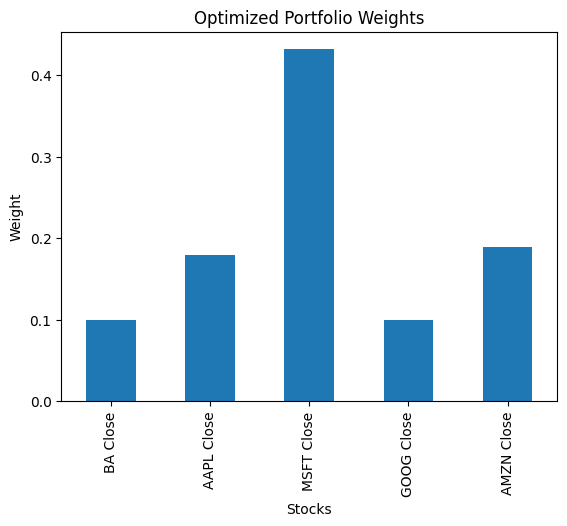

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

# Use the calculated average risk-free rate (replace with actual calculated value)
risk_free_rate = 0.000056  # This is defined in another file

# Define the portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights)  # Already annualized
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Already annualized
    return std, returns

# Define the negative Sharpe ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -(returns - risk_free_rate) / std

# Initial guess for weights (equal distribution)
num_assets = len(mean_returns)
init_guess = num_assets * [1. / num_assets]

# Constraints: sum of weights = 1, each weight >= 0.10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.10, 1.0) for asset in range(num_assets))

# Optimize the portfolio
opt_result = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
opt_weights = opt_result.x

# Create a DataFrame to display the weights
weights_df = pd.DataFrame(opt_weights, index=mean_returns.index, columns=['Weight'])

# Display the optimal weights
print(weights_df)

# Plot the optimal weights
weights_df.plot(kind='bar', legend=False)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()


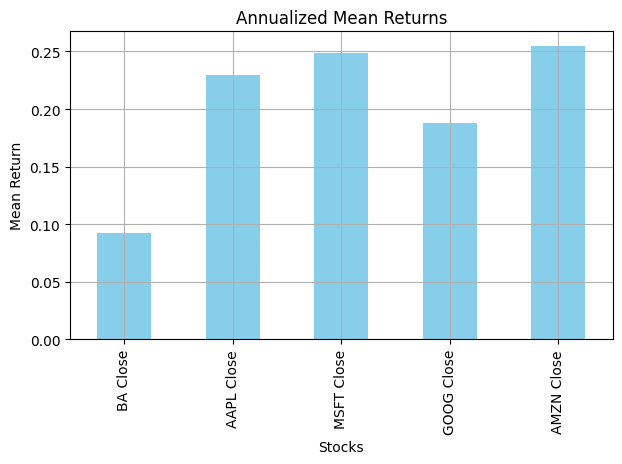

In [4]:
import matplotlib.pyplot as plt

# Plot annualized mean returns
plt.figure(figsize=(7, 4))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Annualized Mean Returns')
plt.xlabel('Stocks')
plt.ylabel('Mean Return')
plt.grid(True)
plt.show()

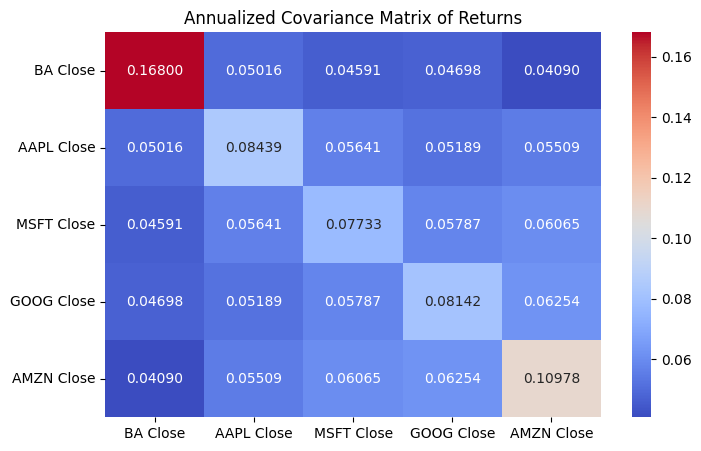

In [5]:
import seaborn as sns

# Plot annualized covariance matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cov_matrix, annot=True, fmt=".5f", cmap='coolwarm')
plt.title('Annualized Covariance Matrix of Returns')
plt.show()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix of daily returns
correlation_matrix = daily_return_df.iloc[1:, 1:].corr()  # Exclude the 'Date' column

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
             BA Close  AAPL Close  MSFT Close  GOOG Close  AMZN Close
BA Close    1.000000    0.421311    0.402780    0.401675    0.301140
AAPL Close  0.421311    1.000000    0.698276    0.625945    0.572366
MSFT Close  0.402780    0.698276    1.000000    0.729258    0.658206
GOOG Close  0.401675    0.625945    0.729258    1.000000    0.661525
AMZN Close  0.301140    0.572366    0.658206    0.661525    1.000000


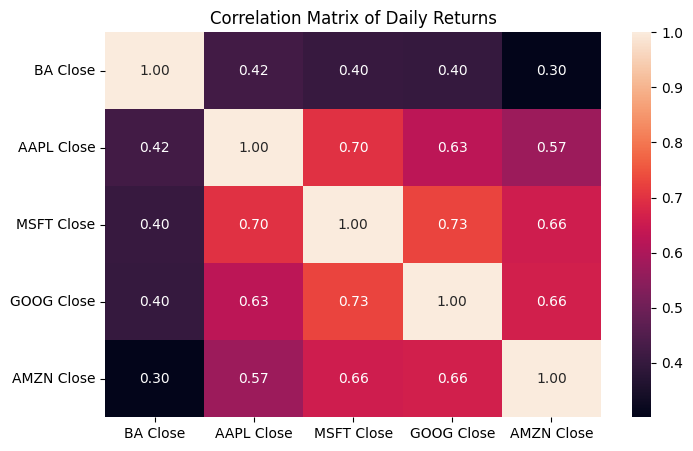

In [7]:
# Plot the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()


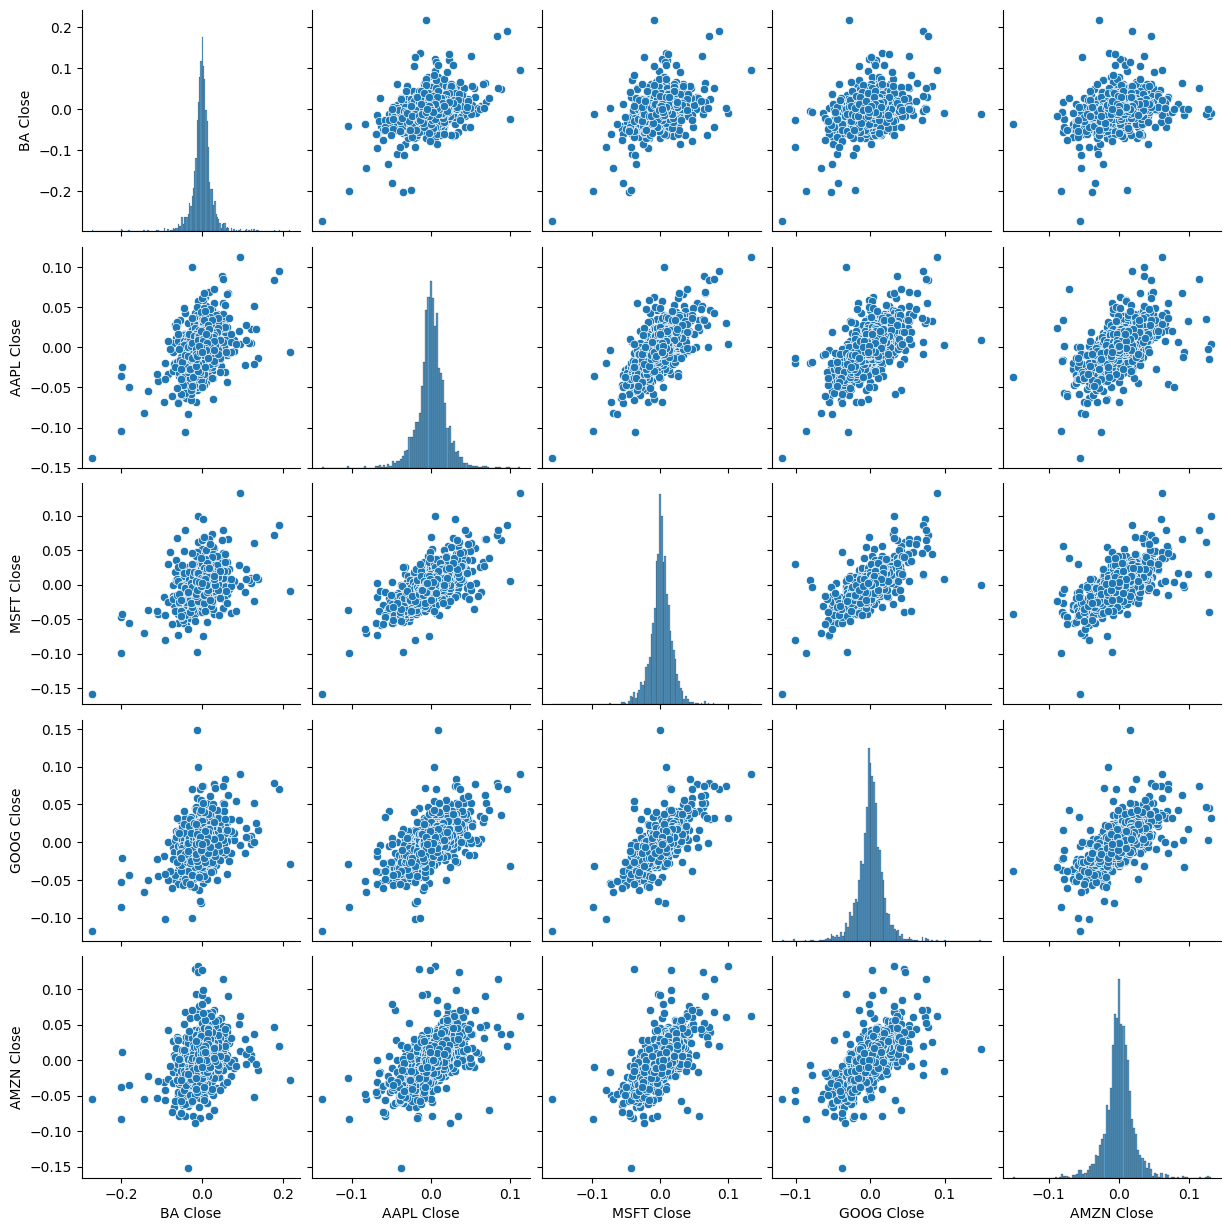

In [8]:
sns.pairplot(daily_return_df);

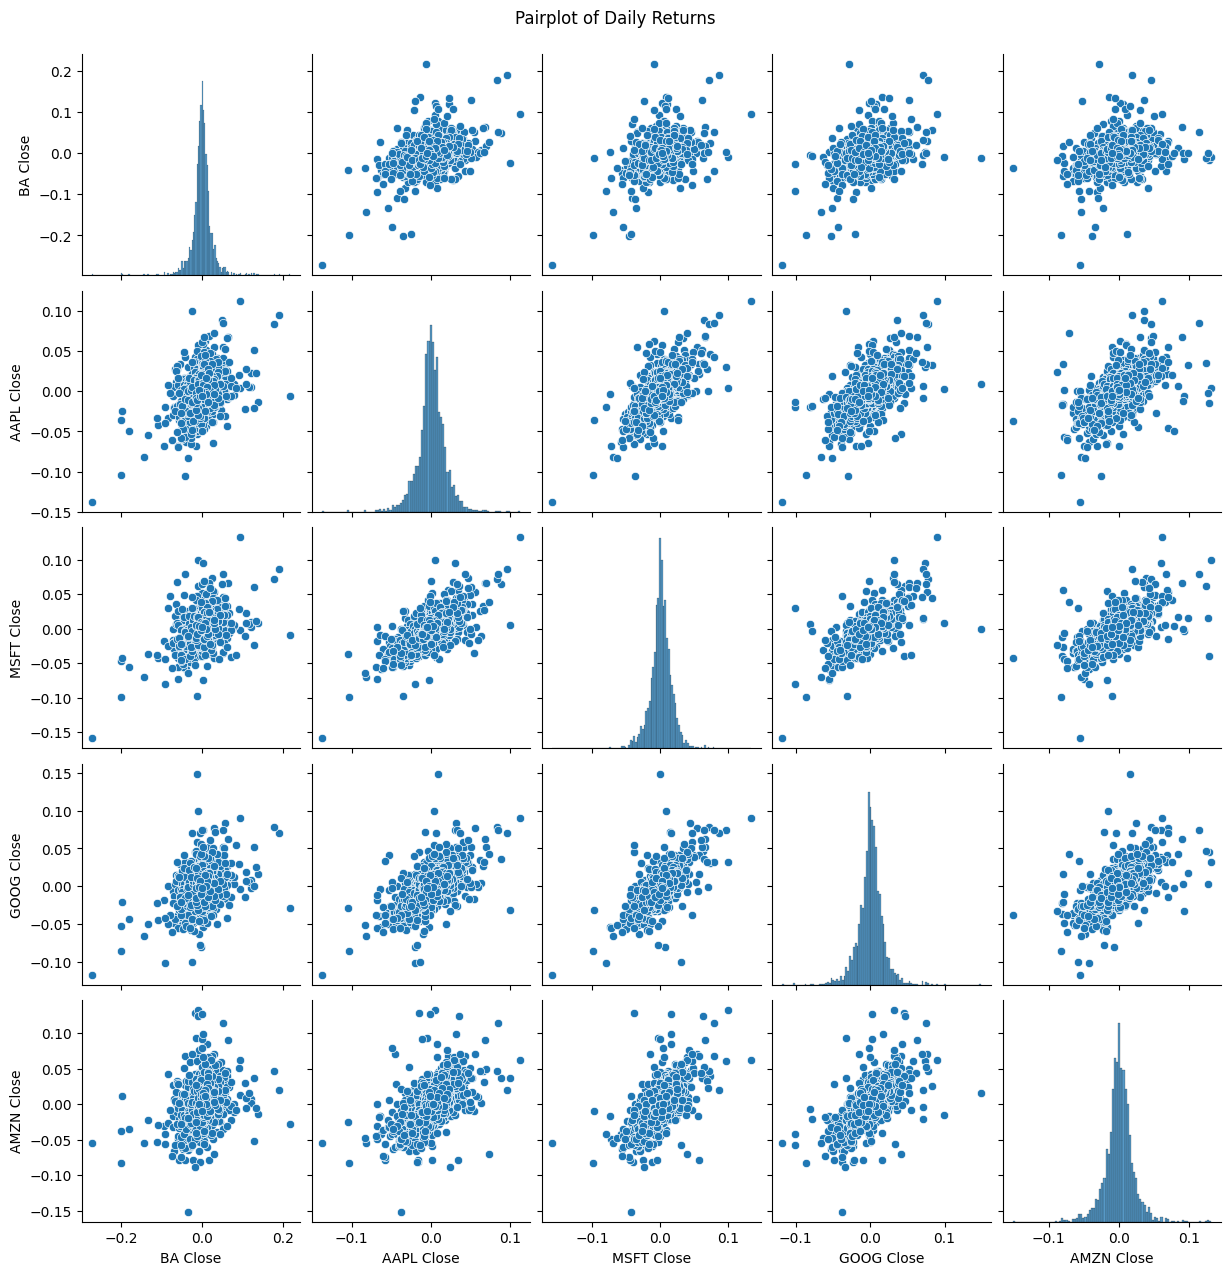

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Date' column for pairplot
returns_data = daily_return_df.iloc[:, 1:]

# Create a pairplot
sns.pairplot(returns_data)
plt.suptitle('Pairplot of Daily Returns', y=1.02)
plt.show()


In [10]:
# Portfolio analysis



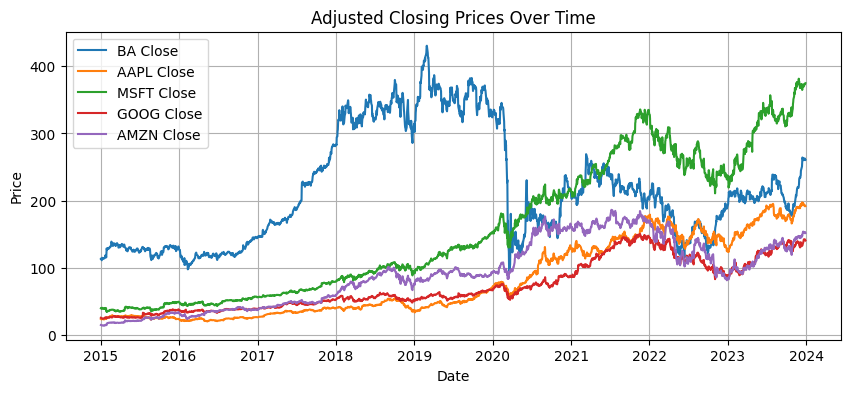

In [11]:
# Time series plot of adjusted closing prices
plt.figure(figsize=(10, 4))
for column in portfolio_df.columns[1:]:
    plt.plot(portfolio_df['Date'], portfolio_df[column], label=column)
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


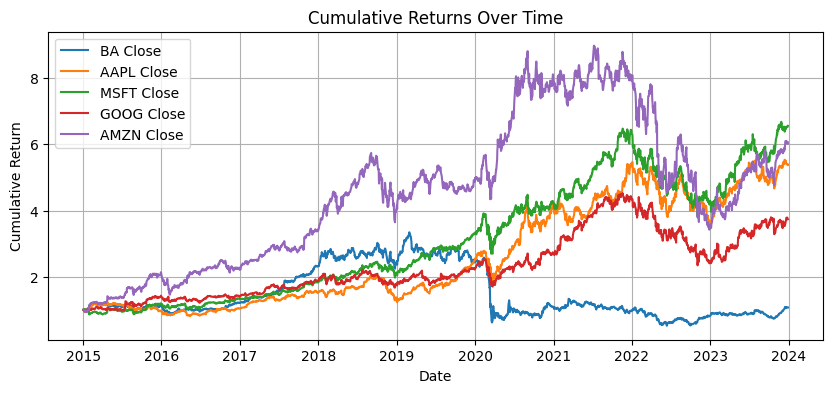

In [12]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_return_df.iloc[:, 1:]).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 4))
for column in cumulative_returns.columns:
    plt.plot(daily_return_df['Date'], cumulative_returns[column], label=column)
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


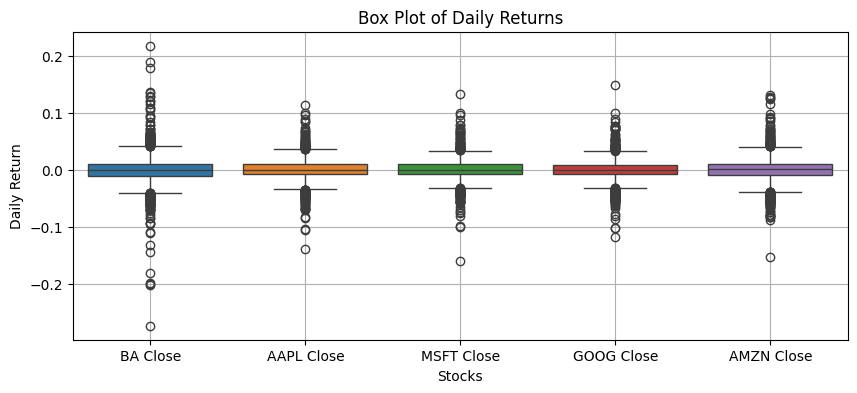

In [13]:
# Box plot of daily returns
plt.figure(figsize=(10, 4))
sns.boxplot(data=daily_return_df.iloc[:, 1:])
plt.title('Box Plot of Daily Returns')
plt.xlabel('Stocks')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


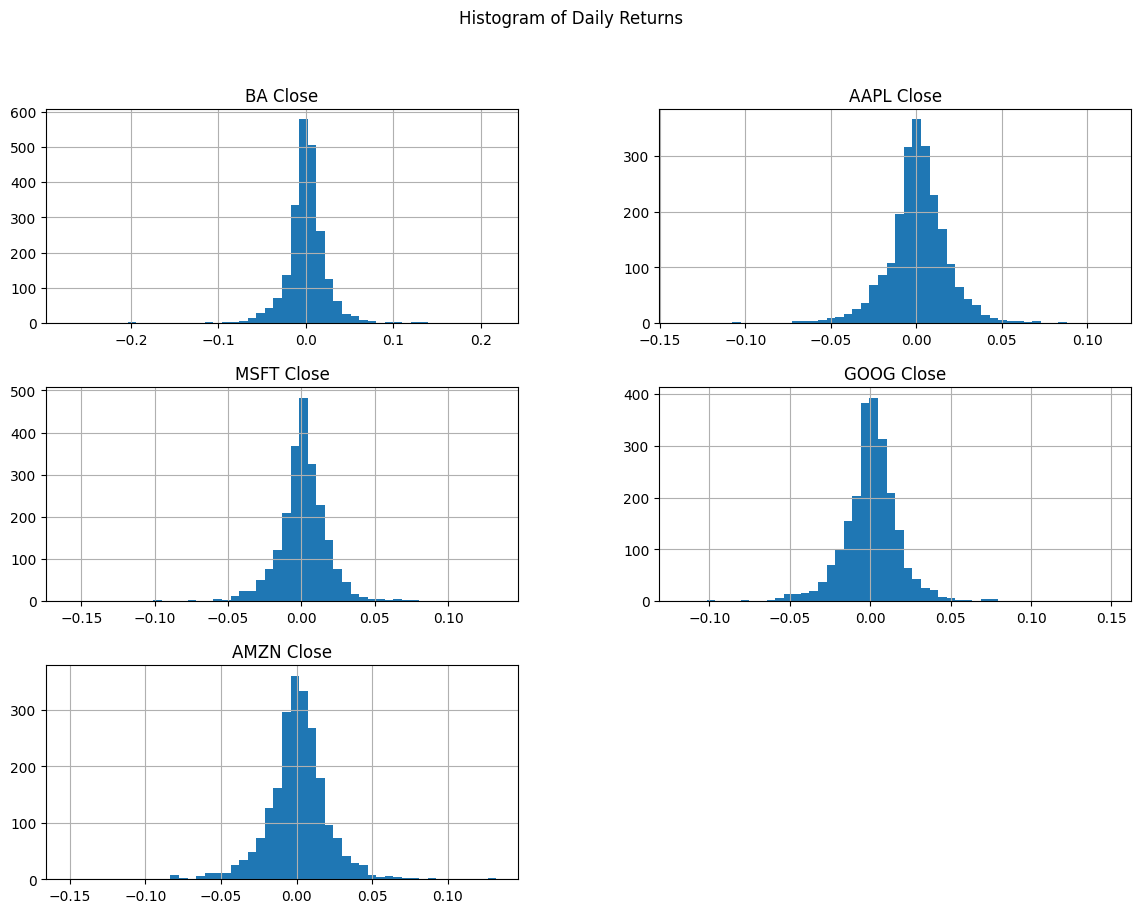

In [14]:
# Histogram of daily returns
daily_return_df.iloc[:, 1:].hist(bins=50, figsize=(14, 10))
plt.suptitle('Histogram of Daily Returns')
plt.show()


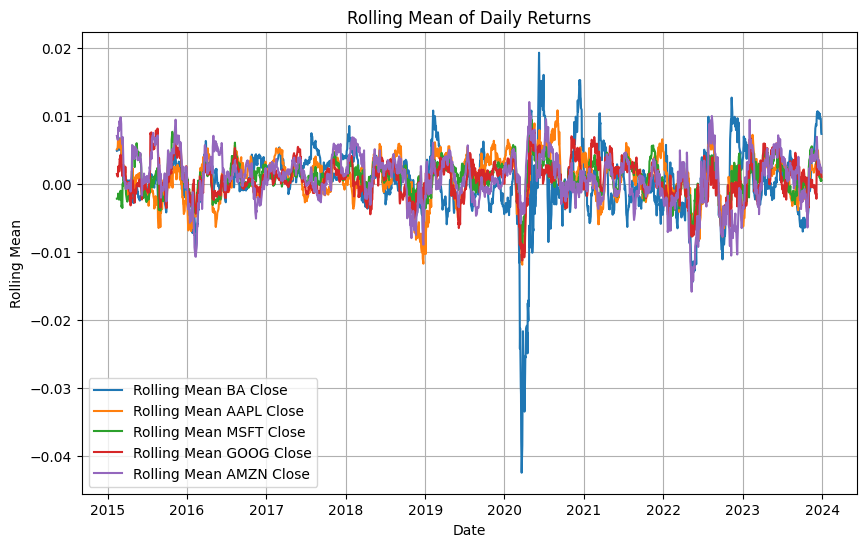

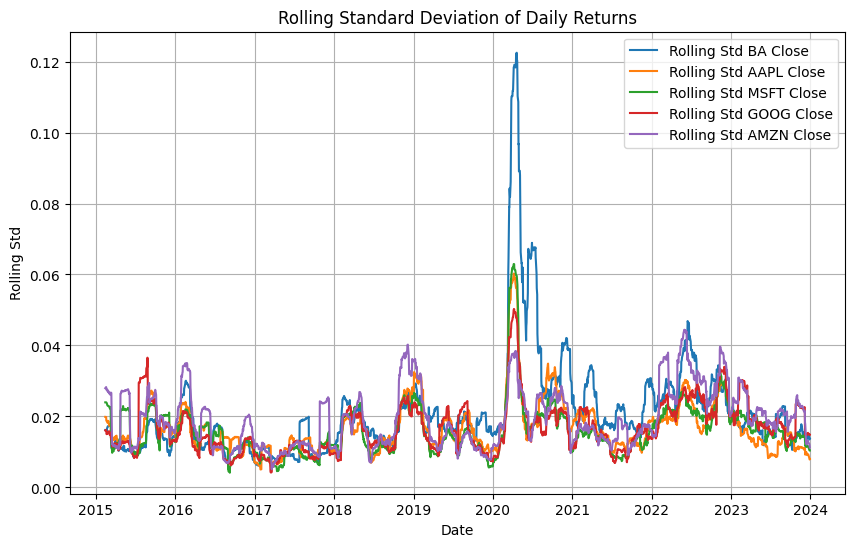

In [15]:
# Calculate rolling mean and standard deviation
rolling_window = 30  # 30 days window
rolling_means = daily_return_df.iloc[:, 1:].rolling(window=rolling_window).mean()
rolling_stds = daily_return_df.iloc[:, 1:].rolling(window=rolling_window).std()

# Plot rolling mean
plt.figure(figsize=(10, 6))
for column in rolling_means.columns:
    plt.plot(daily_return_df['Date'], rolling_means[column], label=f'Rolling Mean {column}')
plt.title('Rolling Mean of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
for column in rolling_stds.columns:
    plt.plot(daily_return_df['Date'], rolling_stds[column], label=f'Rolling Std {column}')
plt.title('Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Std')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#Time Series Plot: Trends and overall performance.
#Cumulative Returns: Growth of $1 invested over time.
#Box Plot: Distribution of returns and outliers.
#Histogram: Frequency distribution of returns.
#Rolling Statistics: Time-varying mean and volatility.
#Correlation Matrix: Relationships between stocks.

In [17]:
# Assuming you have already calculated opt_weights from previous steps

# Initial portfolio value
initial_investment = 1_000_000_000  # 1 billion dollars

# Calculate the daily portfolio returns
portfolio_daily_return = daily_return_df.iloc[:, 1:].dot(opt_weights)

# Calculate the daily portfolio value
portfolio_value = (1 + portfolio_daily_return).cumprod() * initial_investment

# Calculate the value of each stock position in the portfolio
stock_positions = (daily_return_df.iloc[:, 1:] + 1).cumprod().mul(opt_weights * initial_investment, axis=1)


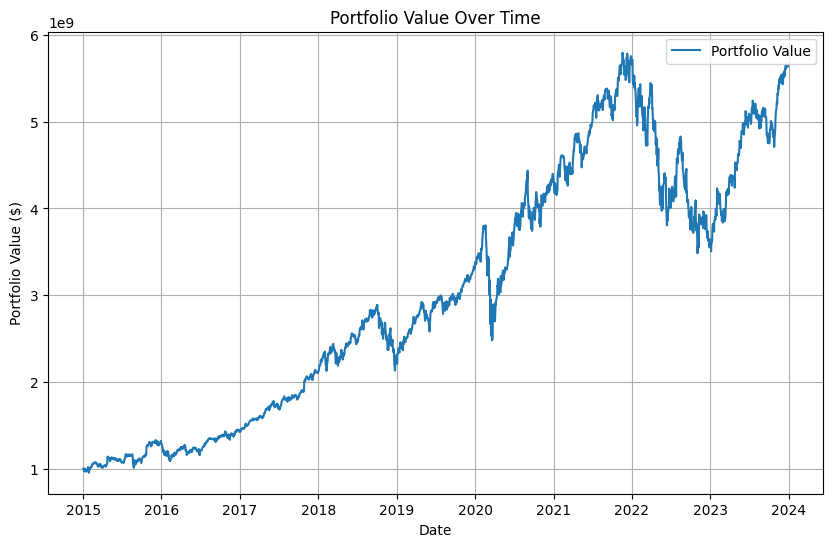

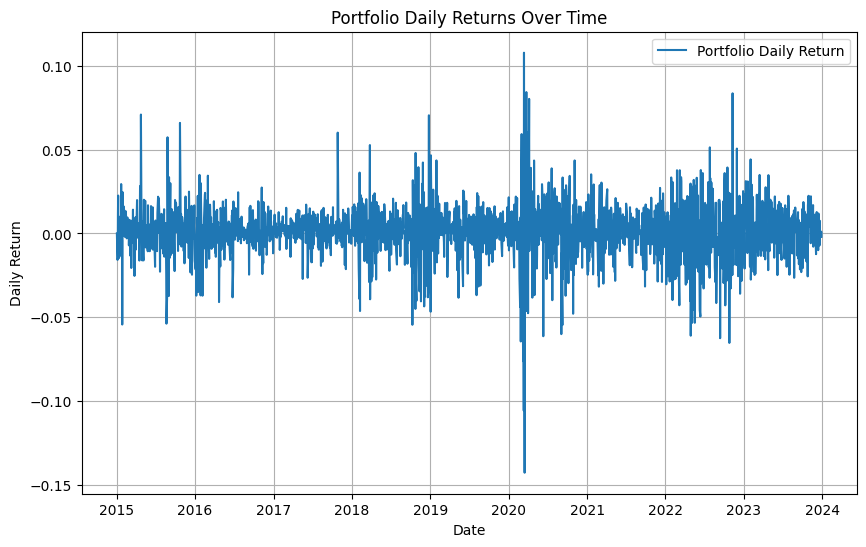

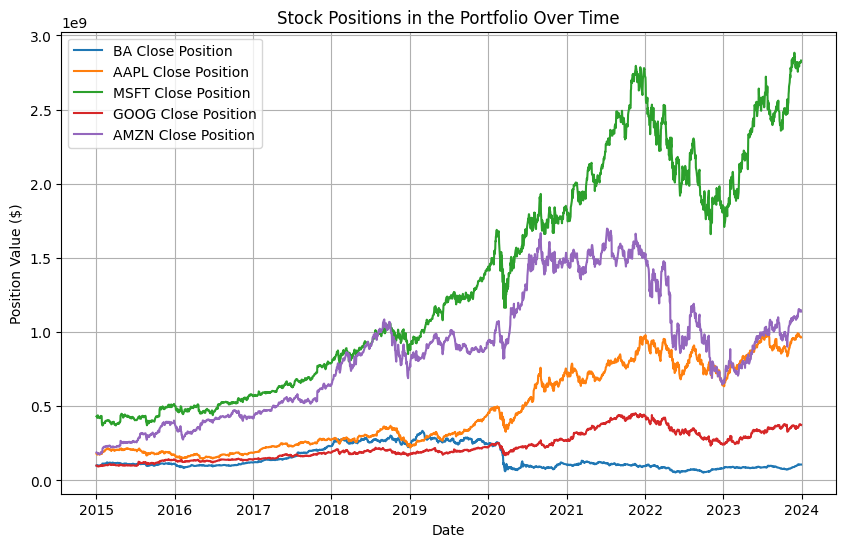

In [18]:
import matplotlib.pyplot as plt

# Plot the portfolio value
plt.figure(figsize=(10, 6))
plt.plot(daily_return_df['Date'], portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the portfolio daily returns
plt.figure(figsize=(10, 6))
plt.plot(daily_return_df['Date'], portfolio_daily_return, label='Portfolio Daily Return')
plt.title('Portfolio Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot each stock position in the portfolio value
plt.figure(figsize=(10, 6))
for column in stock_positions.columns:
    plt.plot(daily_return_df['Date'], stock_positions[column], label=f'{column} Position')
plt.title('Stock Positions in the Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Position Value ($)')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Assuming you have already calculated opt_weights, portfolio_daily_return, and portfolio_value from previous steps

# Calculate annualized portfolio return and standard deviation
annualized_return = portfolio_daily_return.mean() * 252
annualized_std_dev = portfolio_daily_return.std() * np.sqrt(252)

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

# Calculate Sortino Ratio
downside_returns = portfolio_daily_return[portfolio_daily_return < 0]
annualized_downside_std_dev = downside_returns.std() * np.sqrt(252)
sortino_ratio = (annualized_return - risk_free_rate) / annualized_downside_std_dev

# Assume beta of the market is 1 for simplicity
# Beta is calculated with respect to the market returns (not provided here, assuming a placeholder value for illustration)
beta_portfolio = 1  # Replace this with actual calculation based on market returns

# Calculate Alpha (assuming market return R_m)
market_return = 0.08  # Example market return, replace with actual value
alpha_portfolio = annualized_return - (beta_portfolio * market_return + risk_free_rate)

# Calculate Maximum Drawdown
cumulative_returns = (1 + portfolio_daily_return).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# Calculate Value at Risk (VaR) at 95% confidence level
var_95 = np.percentile(portfolio_daily_return, 5)
value_at_risk_95 = -initial_investment * var_95

# Print the calculated metrics
print(f"Annualized Return: {annualized_return:.2f}")
print(f"Annualized Standard Deviation: {annualized_std_dev:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Beta: {beta_portfolio:.2f}")
print(f"Alpha: {alpha_portfolio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Value at Risk (95% confidence level): ${value_at_risk_95:.2f}")


Annualized Return: 0.22
Annualized Standard Deviation: 0.25
Sharpe Ratio: 0.89
Sortino Ratio: 1.12
Beta: 1.00
Alpha: 0.14
Maximum Drawdown: -39.89%
Value at Risk (95% confidence level): $24972044.52


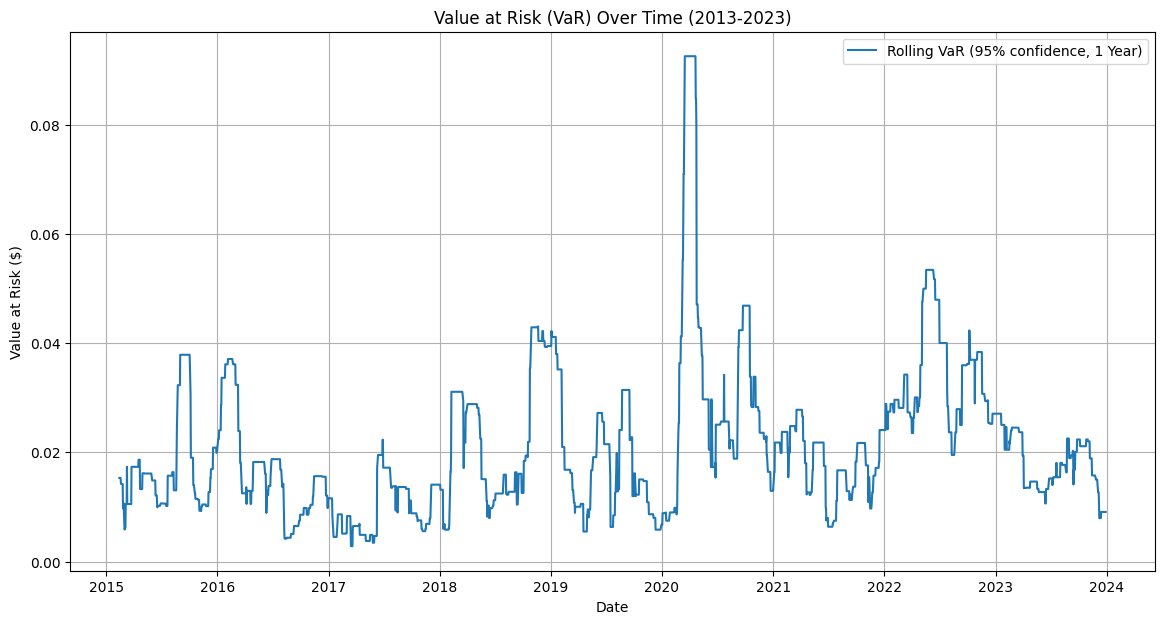

In [20]:
def rolling_var(returns, window=252, confidence_level=0.05):
    return returns.rolling(window=window).apply(lambda x: -np.percentile(x, confidence_level*100))

rolling_var_95 = rolling_var(portfolio_daily_return, window=rolling_window, confidence_level=0.05)

plt.figure(figsize=(14, 7))
plt.plot(daily_return_df['Date'], rolling_var_95, label='Rolling VaR (95% confidence, 1 Year)')
plt.title('Value at Risk (VaR) Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Value at Risk ($)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
opt_weights

array([0.1       , 0.17927765, 0.43162484, 0.1       , 0.18909751])

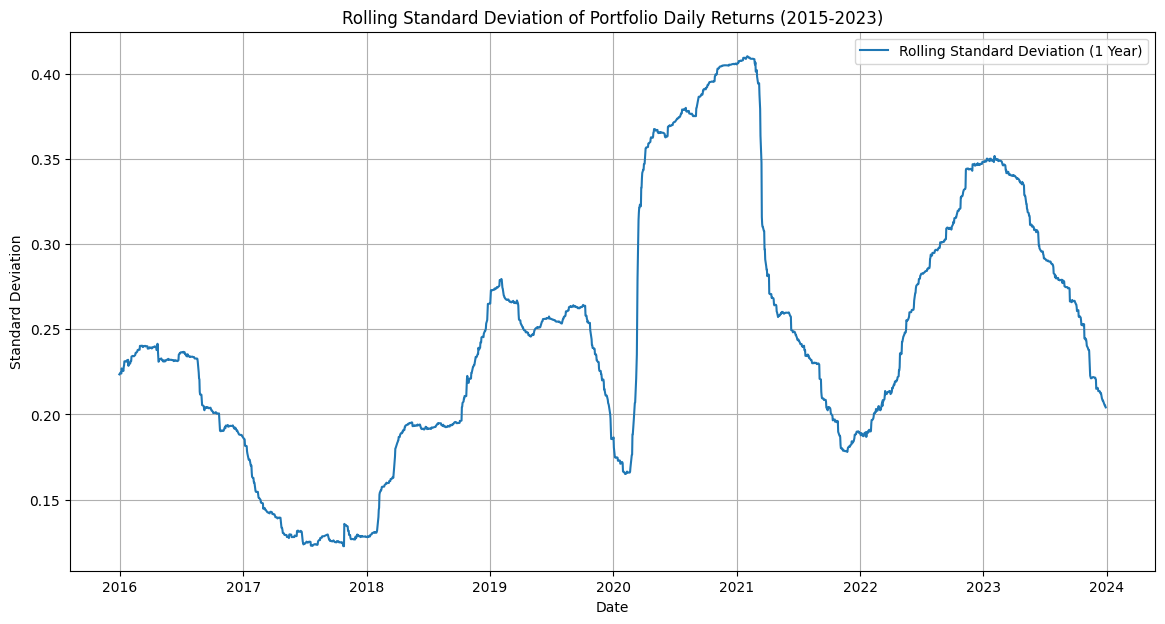

In [22]:
# Calculate the rolling standard deviation (annualized) with a 252 trading days window
rolling_std_dev = portfolio_daily_return.rolling(window=252).std() * np.sqrt(252)

# Plot the rolling standard deviation
plt.figure(figsize=(14, 7))
plt.plot(daily_return_df['Date'], rolling_std_dev, label='Rolling Standard Deviation (1 Year)')
plt.title('Rolling Standard Deviation of Portfolio Daily Returns (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import yfinance as yf

# Define the benchmark tickers
benchmarks = ['SPY', 'QQQ']

# Download benchmark data from Yahoo Finance
benchmark_data = yf.download(benchmarks, start='2015-01-01', end='2023-12-31')['Adj Close']
benchmark_data = benchmark_data.dropna()

# Display the first few rows of the benchmark data
benchmark_data


[*********************100%%**********************]  2 of 2 completed


Ticker,QQQ,SPY
Date,,
2015-01-02,95.704735,174.265320
2015-01-05,94.300819,171.118195
2015-01-06,93.036438,169.506378
2015-01-07,94.235764,171.618607
2015-01-08,96.039421,174.663971
...,...,...
2023-12-22,407.626312,472.182892
2023-12-26,410.121704,474.176697
2023-12-27,410.956604,475.034058


Annualized Mean Returns:
 BA Close      0.092429
AAPL Close    0.229723
MSFT Close    0.248276
GOOG Close    0.187491
AMZN Close    0.254721
dtype: float64
Annualized Covariance Matrix:
             BA Close  AAPL Close  MSFT Close  GOOG Close  AMZN Close
BA Close    0.167997    0.050165    0.045909    0.046979    0.040896
AAPL Close  0.050165    0.084389    0.056409    0.051887    0.055091
MSFT Close  0.045909    0.056409    0.077333    0.057868    0.060646
GOOG Close  0.046979    0.051887    0.057868    0.081425    0.062544
AMZN Close  0.040896    0.055091    0.060646    0.062544    0.109780
              Weight
BA Close    0.100000
AAPL Close  0.179278
MSFT Close  0.431625
GOOG Close  0.100000
AMZN Close  0.189098
Portfolio's Expected Annualized Return: 0.2245
Portfolio's Annualized Risk (Standard Deviation): 0.2517


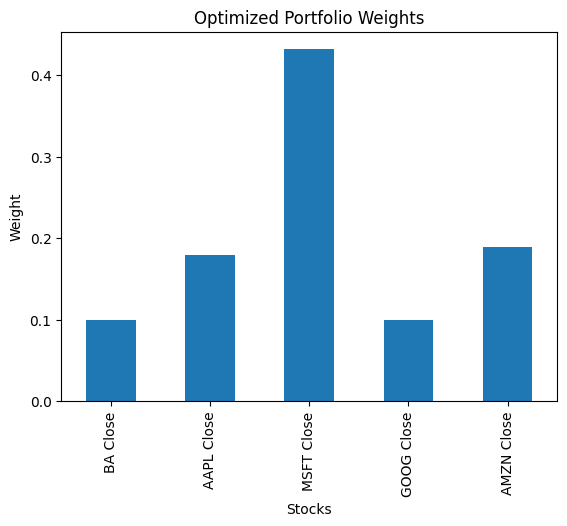

In [24]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Display the mean returns and covariance matrix to verify correctness
print("Annualized Mean Returns:\n", mean_returns)
print("Annualized Covariance Matrix:\n", cov_matrix)

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Define the portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights)  # Already annualized
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Already annualized
    return std, returns

# Define the negative Sharpe ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -(returns - risk_free_rate) / std

# Initial guess for weights (equal distribution)
num_assets = len(mean_returns)
init_guess = num_assets * [1. / num_assets]

# Constraints: sum of weights = 1, each weight >= 0.10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.10, 1.0) for asset in range(num_assets))

# Optimize the portfolio
opt_result = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
opt_weights = opt_result.x

# Create a DataFrame to display the weights
weights_df = pd.DataFrame(opt_weights, index=mean_returns.index, columns=['Weight'])

# Display the optimal weights
print(weights_df)

# Calculate the portfolio performance metrics using the optimal weights
portfolio_std, portfolio_return = portfolio_performance(opt_weights, mean_returns, cov_matrix, risk_free_rate)

# Display the portfolio's expected return and risk (standard deviation)
print(f"Portfolio's Expected Annualized Return: {portfolio_return:.4f}")
print(f"Portfolio's Annualized Risk (Standard Deviation): {portfolio_std:.4f}")

# Plot the optimal weights
weights_df.plot(kind='bar', legend=False)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()


[*********************100%%**********************]  4 of 4 completed


        Mean Return  Volatility
Ticker                         
XLC        0.076736    0.243105
XLI        0.098130    0.231593
XLK        0.190196    0.272086
XLY        0.094978    0.251887


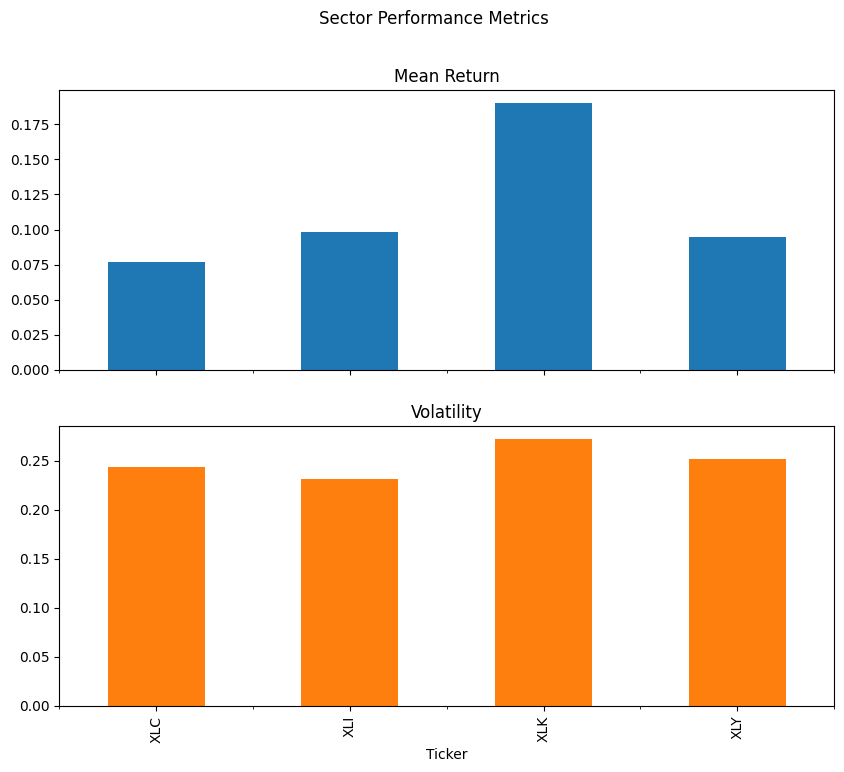

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the sector ETFs
sector_etfs = {
    'Technology': 'XLK',
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Industrials': 'XLI'
}

# Download historical data for the sector ETFs
sector_data = yf.download(list(sector_etfs.values()), start='2015-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns for the sector ETFs
sector_returns = np.log(sector_data / sector_data.shift(1)).dropna()

# Calculate annualized mean returns and volatilities for the sector ETFs
sector_mean_returns = sector_returns.mean() * 252
sector_volatilities = sector_returns.std() * np.sqrt(252)

# Display the sector performance metrics
sector_performance = pd.DataFrame({
    'Mean Return': sector_mean_returns,
    'Volatility': sector_volatilities
})

print(sector_performance)

# Plot the sector performance metrics
sector_performance.plot(kind='bar', subplots=True, layout=(2, 1), figsize=(10, 8), legend=False, title='Sector Performance Metrics')
plt.show()


              Weight
BA Close    0.100000
AAPL Close  0.179278
MSFT Close  0.431625
GOOG Close  0.100000
AMZN Close  0.189098
Portfolio's Expected Annualized Return: 0.2245
Portfolio's Annualized Risk (Standard Deviation): 0.2517
Portfolio's Sharpe Ratio: 0.8916


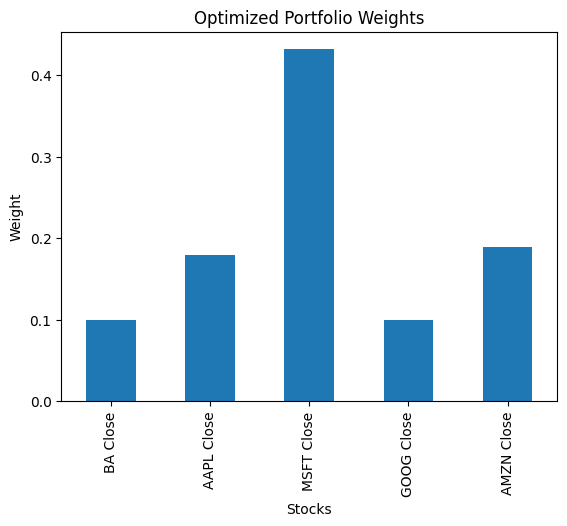

In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Define the portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights)  # Already annualized
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Already annualized
    return std, returns

# Define the negative Sharpe ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -(returns - risk_free_rate) / std

# Initial guess for weights (equal distribution)
num_assets = len(mean_returns)
init_guess = num_assets * [1. / num_assets]

# Constraints: sum of weights = 1, each weight >= 0.10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.10, 1.0) for asset in range(num_assets))

# Optimize the portfolio
opt_result = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
opt_weights = opt_result.x

# Create a DataFrame to display the weights
weights_df = pd.DataFrame(opt_weights, index=mean_returns.index, columns=['Weight'])

# Display the optimal weights
print(weights_df)

# Calculate the portfolio's daily returns using the optimal weights
portfolio_daily_returns = daily_return_df.iloc[1:, 1:].dot(opt_weights)

# Calculate the portfolio's annualized return and standard deviation
portfolio_annual_return = portfolio_daily_returns.mean() * 252
portfolio_annual_std = portfolio_daily_returns.std() * np.sqrt(252)

# Calculate the Sharpe ratio
sharpe_ratio = (portfolio_annual_return - risk_free_rate) / portfolio_annual_std

# Display the portfolio's expected return, risk, and Sharpe ratio
print(f"Portfolio's Expected Annualized Return: {portfolio_annual_return:.4f}")
print(f"Portfolio's Annualized Risk (Standard Deviation): {portfolio_annual_std:.4f}")
print(f"Portfolio's Sharpe Ratio: {sharpe_ratio:.4f}")

# Plot the optimal weights
weights_df.plot(kind='bar', legend=False)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()


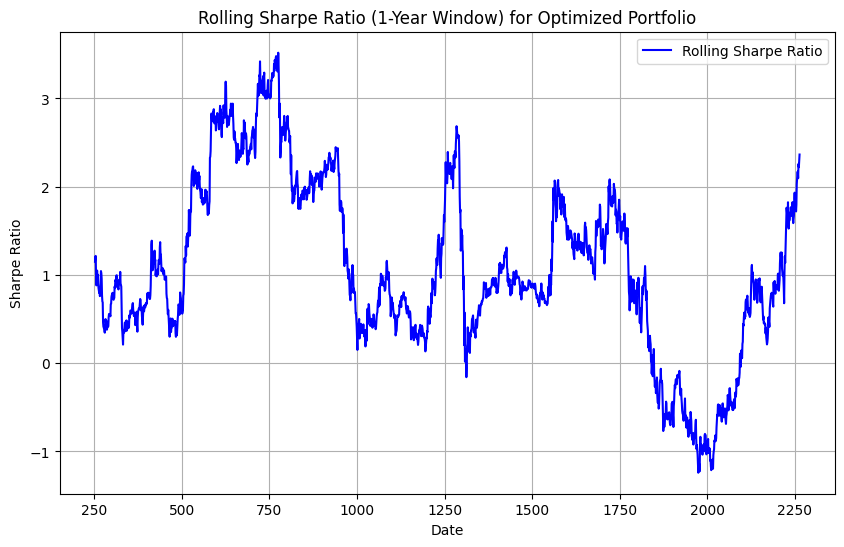

In [30]:
# Calculate the rolling Sharpe ratio
window = 252  # Rolling window of 1 year (252 trading days)
rolling_mean_returns = portfolio_daily_returns.rolling(window=window).mean() * 252
rolling_std = portfolio_daily_returns.rolling(window=window).std() * np.sqrt(252)
rolling_sharpe_ratio = (rolling_mean_returns - risk_free_rate) / rolling_std

# Plot the rolling Sharpe ratio
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe_ratio, label='Rolling Sharpe Ratio', color='b')
plt.title('Rolling Sharpe Ratio (1-Year Window) for Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# Calculate the portfolio's daily returns using the optimal weights
portfolio_daily_returns = daily_return_df.iloc[1:, 1:].dot(opt_weights)

# Calculate the portfolio's daily standard deviation
portfolio_daily_std = portfolio_daily_returns.rolling(window=252).std()

# Create a DataFrame with the portfolio daily returns and standard deviation
portfolio_metrics_df = pd.DataFrame({
    'Date': daily_return_df.iloc[1:, 0],
    'Portfolio Daily Log Return': portfolio_daily_returns,
    'Portfolio Daily Std Dev': portfolio_daily_std
})

# Save the DataFrame to a CSV file
output_file_path = '/Users/haoguannan/Downloads/portfolio_daily_metrics.csv'
portfolio_metrics_df.to_csv(output_file_path, index=False)

print(f"Portfolio daily metrics saved to {output_file_path}")
portfolio_metrics_df

Portfolio daily metrics saved to /Users/haoguannan/Downloads/portfolio_daily_metrics.csv


,Date,Portfolio Daily Log Return,Portfolio Daily Std Dev
1,2015-01-05,-0.015832,NaN
2,2015-01-06,-0.014263,NaN
3,2015-01-07,0.011309,NaN
4,2015-01-08,0.022630,NaN
5,2015-01-09,-0.007187,NaN
...,...,...,...
2259,2023-12-22,-0.000272,0.013076
2260,2023-12-26,0.000538,0.012937
2261,2023-12-27,-0.001908,0.012936
2262,2023-12-28,0.001059,0.012904


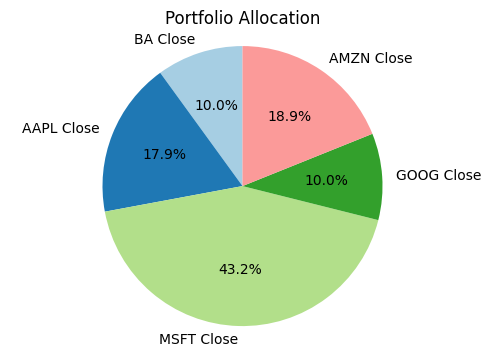

In [34]:
# Visualize the portfolio allocation with a pie chart
plt.figure(figsize=(6, 4))
plt.pie(weights_df['Weight'], labels=weights_df.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Portfolio Allocation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [36]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Define the portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights)  # Already annualized
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Already annualized
    return std, returns

# Define the negative Sharpe ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -(returns - risk_free_rate) / std

# Initial guess for weights (equal distribution)
num_assets = len(mean_returns)
init_guess = num_assets * [1. / num_assets]

# Constraints: sum of weights = 1, each weight >= 0.10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.10, 1.0) for asset in range(num_assets))

# Optimize the portfolio
opt_result = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
opt_weights = opt_result.x

# Calculate the portfolio's daily returns using the optimal weights
portfolio_daily_returns = daily_return_df.iloc[1:, 1:].dot(opt_weights)

# Calculate the portfolio's total value, assuming initial investment of 1 billion
initial_investment = 1_000_000_000
portfolio_total_value = (1 + portfolio_daily_returns).cumprod() * initial_investment

# Calculate the portfolio's daily standard deviation using a rolling window (e.g., 30 days)
rolling_window = 30  # Set the rolling window size
portfolio_daily_std = portfolio_daily_returns.rolling(window=rolling_window).std()

# Create a DataFrame with the portfolio daily returns, total value, and rolling standard deviation
portfolio_metrics_df = pd.DataFrame({
    'Date': daily_return_df.iloc[1:, 0],
    'Portfolio Daily Log Return': portfolio_daily_returns,
    'Portfolio Total Value': portfolio_total_value,
    'Portfolio Daily Std Dev': portfolio_daily_std
})

portfolio_metrics_df


,Date,Portfolio Daily Log Return,Portfolio Total Value,Portfolio Daily Std Dev
1,2015-01-05,-0.015832,9.841677e+08,NaN
2,2015-01-06,-0.014263,9.701307e+08,NaN
3,2015-01-07,0.011309,9.811017e+08,NaN
4,2015-01-08,0.022630,1.003304e+09,NaN
5,2015-01-09,-0.007187,9.960931e+08,NaN
...,...,...,...,...
2259,2023-12-22,-0.000272,5.651247e+09,0.008846
2260,2023-12-26,0.000538,5.654289e+09,0.008056
2261,2023-12-27,-0.001908,5.643502e+09,0.008041
2262,2023-12-28,0.001059,5.649478e+09,0.007735


In [37]:
# Fetch S&P 500 data
sp500_ticker = '^GSPC'
sp500_data = yf.download(sp500_ticker, start='2015-01-01', end='2023-12-31')['Adj Close']

# Calculate S&P 500 daily returns using the natural logarithm
sp500_daily_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Calculate the S&P 500 total value, assuming initial investment of 1 billion
sp500_total_value = (1 + sp500_daily_returns).cumprod() * initial_investment

# Calculate the S&P 500 daily standard deviation using a rolling window (e.g., 30 days)
sp500_daily_std = sp500_daily_returns.rolling(window=rolling_window).std()

# Create a DataFrame with the S&P 500 daily returns, total value, and rolling standard deviation
sp500_metrics_df = pd.DataFrame({
    'Date': sp500_daily_returns.index,
    'SP500 Daily Log Return': sp500_daily_returns,
    'SP500 Total Value': sp500_total_value,
    'SP500 Daily Std Dev': sp500_daily_std
})

sp500_metrics_df

[*********************100%%**********************]  1 of 1 completed


,Date,SP500 Daily Log Return,SP500 Total Value,SP500 Daily Std Dev
Date,,,,
2015-01-05,2015-01-05,-0.018447,9.815528e+08,NaN
2015-01-06,2015-01-06,-0.008933,9.727843e+08,NaN
2015-01-07,2015-01-07,0.011563,9.840324e+08,NaN
2015-01-08,2015-01-08,0.017730,1.001479e+09,NaN
2015-01-09,2015-01-09,-0.008439,9.930276e+08,NaN
...,...,...,...,...
2023-12-22,2023-12-22,0.001659,1.982757e+09,0.006429
2023-12-26,2023-12-26,0.004223,1.991129e+09,0.005987
2023-12-27,2023-12-27,0.001429,1.993976e+09,0.005956


[*********************100%%**********************]  1 of 1 completed


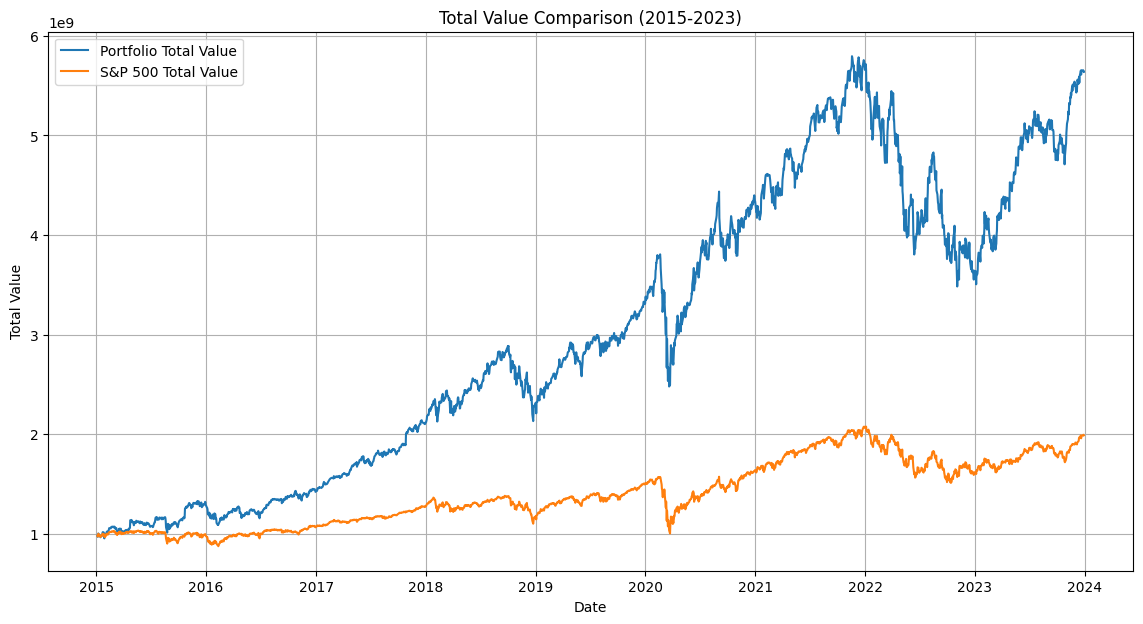

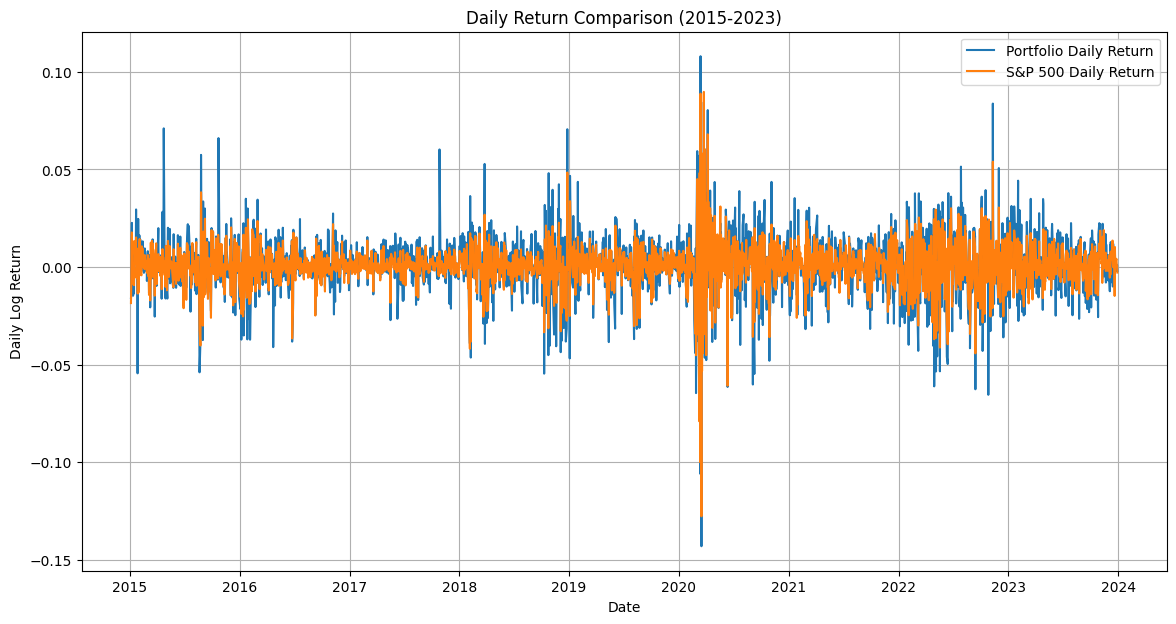

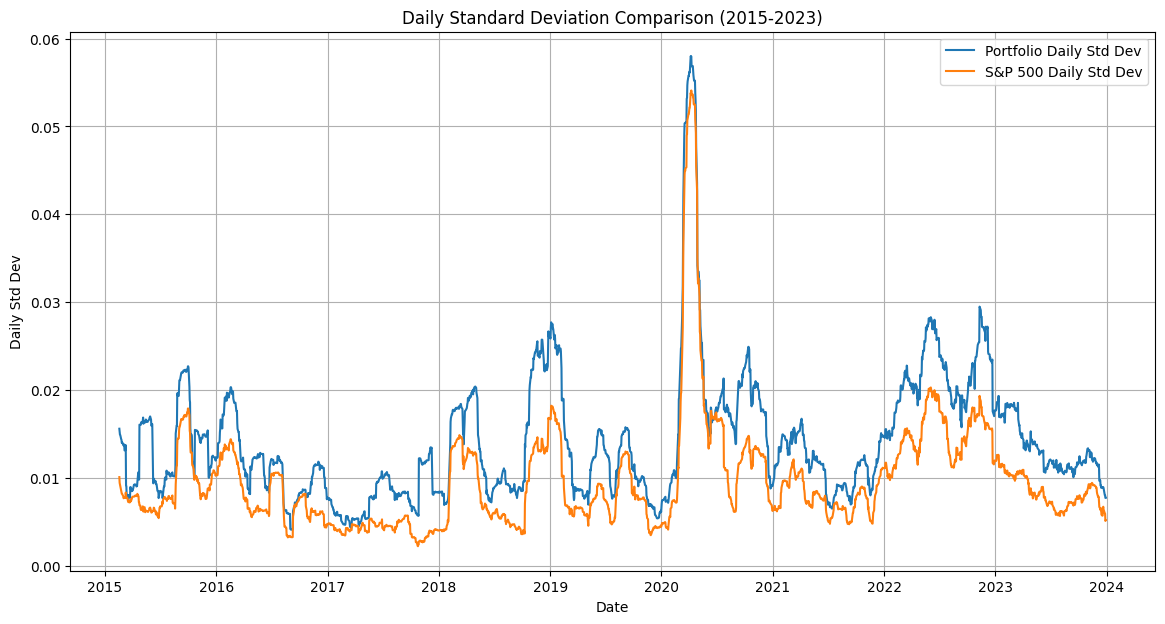

In [39]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
file_path = '/Users/haoguannan/Downloads/Portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])

# Calculate daily returns using the natural logarithm
daily_return_df = pd.DataFrame()
daily_return_df['Date'] = portfolio_df['Date']
for column in portfolio_df.columns[1:]:  # Skip the 'Date' column
    daily_return_df[column] = np.log(portfolio_df[column] / portfolio_df[column].shift(1))

# Set the first day's return to 0
daily_return_df.iloc[0, 1:] = 0

# Exclude the 'Date' column for mean returns and covariance matrix calculation
mean_returns = daily_return_df.iloc[1:, 1:].mean() * 252  # Annualize the mean returns
cov_matrix = daily_return_df.iloc[1:, 1:].cov() * 252  # Annualize the covariance matrix

# Define the average risk-free rate (replace with actual calculated value if necessary)
risk_free_rate = 0.000056  # This is defined in another file

# Define the portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights)  # Already annualized
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Already annualized
    return std, returns

# Define the negative Sharpe ratio function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -(returns - risk_free_rate) / std

# Initial guess for weights (equal distribution)
num_assets = len(mean_returns)
init_guess = num_assets * [1. / num_assets]

# Constraints: sum of weights = 1, each weight >= 0.10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.10, 1.0) for asset in range(num_assets))

# Optimize the portfolio
opt_result = minimize(neg_sharpe_ratio, init_guess,
                      args=(mean_returns, cov_matrix, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
opt_weights = opt_result.x

# Calculate the portfolio's daily returns using the optimal weights
portfolio_daily_returns = daily_return_df.iloc[1:, 1:].dot(opt_weights)

# Calculate the portfolio's total value, assuming initial investment of 1 billion
initial_investment = 1_000_000_000
portfolio_total_value = (1 + portfolio_daily_returns).cumprod() * initial_investment

# Calculate the portfolio's daily standard deviation using a rolling window (e.g., 30 days)
rolling_window = 30  # Set the rolling window size
portfolio_daily_std = portfolio_daily_returns.rolling(window=rolling_window).std()

# Create a DataFrame with the portfolio daily returns, total value, and rolling standard deviation
portfolio_metrics_df = pd.DataFrame({
    'Date': daily_return_df.iloc[1:, 0],
    'Portfolio Daily Log Return': portfolio_daily_returns,
    'Portfolio Total Value': portfolio_total_value,
    'Portfolio Daily Std Dev': portfolio_daily_std
})

# Fetch S&P 500 data
sp500_ticker = '^GSPC'
sp500_data = yf.download(sp500_ticker, start='2015-01-01', end='2023-12-31')['Adj Close']

# Calculate S&P 500 daily returns using the natural logarithm
sp500_daily_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# Calculate the S&P 500 total value, assuming initial investment of 1 billion
sp500_total_value = (1 + sp500_daily_returns).cumprod() * initial_investment

# Calculate the S&P 500 daily standard deviation using a rolling window (e.g., 30 days)
sp500_daily_std = sp500_daily_returns.rolling(window=rolling_window).std()

# Create a DataFrame with the S&P 500 daily returns, total value, and rolling standard deviation
sp500_metrics_df = pd.DataFrame({
    'Date': sp500_daily_returns.index,
    'SP500 Daily Log Return': sp500_daily_returns,
    'SP500 Total Value': sp500_total_value,
    'SP500 Daily Std Dev': sp500_daily_std
})

# Reset index to ensure 'Date' is a column
portfolio_metrics_df.set_index('Date', inplace=True)
sp500_metrics_df.set_index('Date', inplace=True)

# Merge the portfolio and S&P 500 data on Date
comparison_df = portfolio_metrics_df.join(sp500_metrics_df, how='inner', lsuffix='_portfolio', rsuffix='_sp500')

# Plot the total value comparison
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Portfolio Total Value'], label='Portfolio Total Value')
plt.plot(comparison_df.index, comparison_df['SP500 Total Value'], label='S&P 500 Total Value')
plt.title('Total Value Comparison (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the daily return comparison
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Portfolio Daily Log Return'], label='Portfolio Daily Return')
plt.plot(comparison_df.index, comparison_df['SP500 Daily Log Return'], label='S&P 500 Daily Return')
plt.title('Daily Return Comparison (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Log Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot the standard deviation comparison
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Portfolio Daily Std Dev'], label='Portfolio Daily Std Dev')
plt.plot(comparison_df.index, comparison_df['SP500 Daily Std Dev'], label='S&P 500 Daily Std Dev')
plt.title('Daily Standard Deviation Comparison (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Std Dev')
plt.legend()
plt.grid(True)
plt.show()

